In [1]:
from pathlib import Path
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('crypto_data.csv')
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
df.shape

(1252, 7)

# Preparing the Data

In [4]:
df = df.loc[df['IsTrading'] == True]

In [5]:
df.shape

(1144, 7)

Getting rid of null values

In [6]:
df.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
IsTrading            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [7]:
crypto = df.dropna()

In [8]:
crypto.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
IsTrading          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [9]:
crypto.shape

(685, 7)

In [10]:
crypto.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

Checking for Duplicates

In [11]:
print(f"Duplicate entries: {crypto.duplicated().sum()}")

Duplicate entries: 0


In [12]:
crypto.shape

(685, 7)

In [13]:
crypto = crypto.loc[crypto['TotalCoinsMined'] > 0]

In [14]:
crypto.shape

(532, 7)

In [15]:
crypto.head(50)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000
10,DASH,Dash,X11,True,PoW/PoS,9.031294e+06,22000000
11,XMR,Monero,CryptoNight-V7,True,PoW,1.720114e+07,0
12,ETC,Ethereum Classic,Ethash,True,PoW,1.133597e+08,210000000
13,ZEC,ZCash,Equihash,True,PoW,7.383056e+06,21000000


In [16]:
crypto['TotalCoinSupply'].unique()

array(['42', '532000000', '314159265359', '21000000', '0', '84000000',
       '22000000', '210000000', '3600570502', '21000000000', '12500000',
       '350000000', '20000000', '64000000', '16768584', '2000000000',
       '384000000000', '169795588', '250000000', '100000000', '247000000',
       '48166000', '500000', '21000000 ', '1000000', '13140000',
       '18000000', '40000000000', '4380000', '16555000000', '13500000000',
       '299792458', '32000000', '11235813', '336000000', '1420609614',
       '70000000', '72245700', '120000000', '90600000000', '265420800',
       '1350000', '42000000', '200000000', '10000000', '2419200000',
       '16180000', '15000000000', '337000000', '3770000', '420000000',
       '98000000', '51200000', '1000', '888000000', '47011968',
       '2300000000', '80000000', '250000', '1600000000', '23000000',
       '5500000', '45000000', '1000000000', '184467440735', '10000000000',
       '2158812800', '500000000', '105120000', '68000000', '1680000000',
       

In [17]:
crypto.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

Making sure all features to be used are numeric

In [18]:
crypto['TotalCoinSupply']= pd.to_numeric(crypto['TotalCoinSupply'])

In [19]:
crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,4.200000e+01
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,5.320000e+08
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,3.141593e+11
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,2.100000e+07
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0.000000e+00


In [20]:
crypto.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [21]:
crypto['Algorithm'].unique()

array(['Scrypt', 'X13', 'SHA-256', 'Ethash', 'X11', 'CryptoNight-V7',
       'Equihash', 'SHA-512', 'Multiple', 'X15', 'Quark', 'Groestl',
       'PoS', 'NeoScrypt', 'SHA3', 'HybridScryptHash256', 'PHI1612',
       'Lyra2REv2', 'CryptoNight', 'Shabal256', 'Counterparty',
       'Stanford Folding', 'QuBit', 'M7 POW', 'Lyra2RE', 'QUAIT',
       'Blake2b', 'BLAKE256', '1GB AES Pattern Search', 'NIST5', 'Dagger',
       'X11GOST', 'POS 3.0', 'SHA-256D', 'Lyra2Z', 'X14', 'DPoS',
       'Dagger-Hashimoto', 'Blake2S', '536', 'Argon2d', 'Cloverhash',
       'Skein', 'Time Travel', 'Keccak', 'SkunkHash v2 Raptor',
       'VeChainThor Authority', 'Ouroboros', 'POS 2.0', 'C11',
       'SkunkHash', 'Proof-of-BibleHash', 'SHA-256 + Hive',
       'Proof-of-Authority', 'XEVAN', 'VBFT', 'IMesh', 'Green Protocol',
       'Semux BFT consensus', 'X16R', 'Tribus', 'CryptoNight Heavy',
       'Jump Consistent Hash', 'HMQ1725', 'Cryptonight-GPU', 'ECC 256K1',
       'Blake', 'Exosis', 'Equihash+Scrypt', 'Le

In [22]:
crypto['IsTrading'].unique()

array([ True])

In [23]:
crypto['ProofType'].unique()

array(['PoW/PoS', 'PoW', 'PoS', 'PoC', 'PoS/PoW/PoT', 'PoST', 'PoW/nPoS',
       'PoS/PoW', 'dPoW/PoW', 'PoW/PoW', 'DPoS', 'TPoS', 'PoW/PoS ',
       'Proof of Authority', 'PoW and PoS', 'POBh', 'PoW + Hive', 'PoA',
       'HPoW', 'Zero-Knowledge Proof', 'DPOS', 'Pos', 'Proof of Trust',
       'LPoS', 'PoS/LPoS'], dtype=object)

Drop unnecessary colums

In [24]:
crypto = crypto.drop('CoinName', axis=1)

In [25]:
crypto = crypto.drop('IsTrading', axis=1)

In [26]:
crypto.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
2,404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
5,1337,X13,PoW/PoS,2.927942e+10,3.141593e+11
7,BTC,SHA-256,PoW,1.792718e+07,2.100000e+07
8,ETH,Ethash,PoW,1.076842e+08,0.000000e+00


In [27]:
crypto = crypto.drop('Unnamed: 0', axis=1)

In [28]:
crypto.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
2,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
5,X13,PoW/PoS,2.927942e+10,3.141593e+11
7,SHA-256,PoW,1.792718e+07,2.100000e+07
8,Ethash,PoW,1.076842e+08,0.000000e+00


In [29]:
crypto['ProofType'].unique()

array(['PoW/PoS', 'PoW', 'PoS', 'PoC', 'PoS/PoW/PoT', 'PoST', 'PoW/nPoS',
       'PoS/PoW', 'dPoW/PoW', 'PoW/PoW', 'DPoS', 'TPoS', 'PoW/PoS ',
       'Proof of Authority', 'PoW and PoS', 'POBh', 'PoW + Hive', 'PoA',
       'HPoW', 'Zero-Knowledge Proof', 'DPOS', 'Pos', 'Proof of Trust',
       'LPoS', 'PoS/LPoS'], dtype=object)

In [30]:
crypto['Algorithm'].unique()

array(['Scrypt', 'X13', 'SHA-256', 'Ethash', 'X11', 'CryptoNight-V7',
       'Equihash', 'SHA-512', 'Multiple', 'X15', 'Quark', 'Groestl',
       'PoS', 'NeoScrypt', 'SHA3', 'HybridScryptHash256', 'PHI1612',
       'Lyra2REv2', 'CryptoNight', 'Shabal256', 'Counterparty',
       'Stanford Folding', 'QuBit', 'M7 POW', 'Lyra2RE', 'QUAIT',
       'Blake2b', 'BLAKE256', '1GB AES Pattern Search', 'NIST5', 'Dagger',
       'X11GOST', 'POS 3.0', 'SHA-256D', 'Lyra2Z', 'X14', 'DPoS',
       'Dagger-Hashimoto', 'Blake2S', '536', 'Argon2d', 'Cloverhash',
       'Skein', 'Time Travel', 'Keccak', 'SkunkHash v2 Raptor',
       'VeChainThor Authority', 'Ouroboros', 'POS 2.0', 'C11',
       'SkunkHash', 'Proof-of-BibleHash', 'SHA-256 + Hive',
       'Proof-of-Authority', 'XEVAN', 'VBFT', 'IMesh', 'Green Protocol',
       'Semux BFT consensus', 'X16R', 'Tribus', 'CryptoNight Heavy',
       'Jump Consistent Hash', 'HMQ1725', 'Cryptonight-GPU', 'ECC 256K1',
       'Blake', 'Exosis', 'Equihash+Scrypt', 'Le

Make Algorithm and Prooftype numeric with dummies and scale the data

In [31]:
crypto = pd.get_dummies(crypto)

In [32]:
crypto.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crypto)

In [34]:
scaled_data.shape

(532, 98)

Dimensionality Reduction using PCA and further with T-sne

In [83]:
pca = PCA(n_components=0.9)
pca_transformed_data = pca.fit_transform(scaled_data)

In [84]:
pca_transformed_data

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
        -4.70553898e-15,  8.14320714e-17,  6.72881598e-15],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
        -5.18854676e-15,  2.67695399e-16,  7.04039388e-15],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
        -1.56483515e-15, -4.75901216e-14, -1.13690369e-13],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
         2.53564823e-14, -1.17899926e-14, -1.20646122e-15],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
        -2.13109686e-15,  1.48268677e-15, -4.42845762e-16],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
        -9.22980829e-15, -4.03651713e-15,  4.66444387e-15]])

In [85]:
pcad = pd.DataFrame(
    data=pca_transformed_data
)

In [86]:
pca_transformed_data.shape

(532, 74)

In [87]:
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [88]:
tsne = TSNE(learning_rate=50)
transformed_features = tsne.fit_transform(pca_transformed_data)

C:\Users\edipa\Anaconda3\envs\newvenv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [89]:
transformed_features.shape

(532, 2)

In [90]:
transformed_features

array([[ -2.3551352,  21.811228 ],
       [  2.7160978,  17.331814 ],
       [  4.0442376,  28.091623 ],
       ...,
       [ 19.56601  ,   0.9708409],
       [ 16.099865 ,  -7.3723316],
       [-10.601895 ,  -9.197444 ]], dtype=float32)

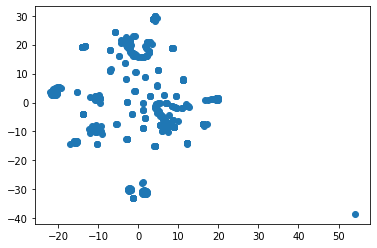

In [91]:
plt.scatter(transformed_features[:,0], transformed_features[:,1])
plt.show()

In [92]:
#There are not very clearly defined the clusters after trying with different learning rates,
#still won't give a clear distribution of clusters

In [93]:

dfcluster = pd.DataFrame(transformed_features)

In [94]:

dfcluster = dfcluster.rename(columns = {0: "Feature1", 1: "Feature2"})
dfcluster

,Feature1,Feature2
0,-2.355135,21.811228
1,2.716098,17.331814
2,4.044238,28.091623
3,1.010159,-30.747431
4,12.201273,-14.120175
...,...,...
527,1.021519,-27.919792
528,-0.510564,16.262739
529,19.566010,0.970841
530,16.099865,-7.372332


# Dimensionality Reduction

In [95]:
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(transformed_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,179848.015625
1,2,97113.757812
2,3,63019.753906
3,4,33358.109375
4,5,27046.593750


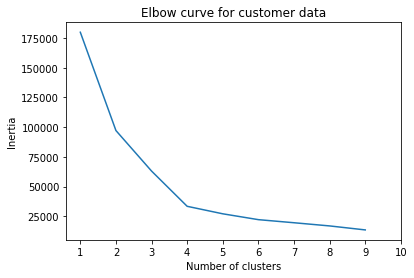

In [96]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [97]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [98]:
clusters = get_clusters(4, dfcluster)

In [99]:
clusters

,Feature1,Feature2,class
0,-2.355135,21.811228,0
1,2.716098,17.331814,0
2,4.044238,28.091623,0
3,1.010159,-30.747431,2
4,12.201273,-14.120175,3
...,...,...,...
527,1.021519,-27.919792,2
528,-0.510564,16.262739,0
529,19.566010,0.970841,3
530,16.099865,-7.372332,3


In [100]:
def show_clusters(df):
    plt.scatter(df['Feature1'], df['Feature2'], c=df['class'])
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.show()

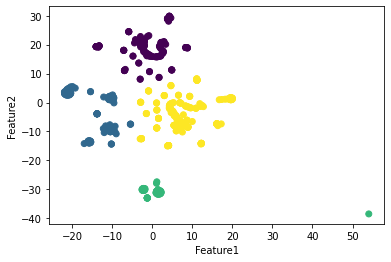

In [101]:
show_clusters(clusters)

# Recommendation

In [102]:
#Based on the number of clusters found we can say that our data can be clustered in 4 groups.